### 肘部分析法使用示例

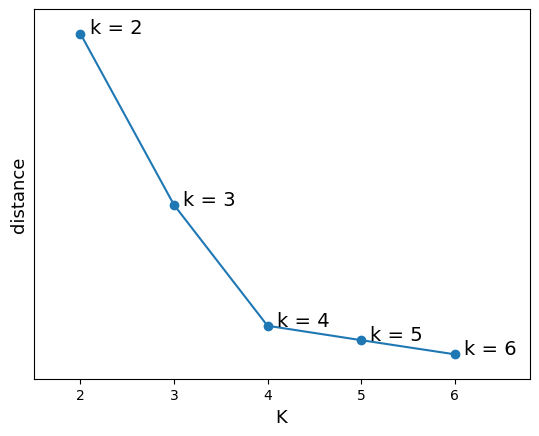

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


def elbow_analysis(X, range_n_clusters, all_cluster_labels, all_centers):
    """
    根据不同K值下的聚类结果来计算簇内距离和并进行可视化
    :param X: shape: [n_samples, n_features]
    :param range_n_clusters:  list
    :param all_cluster_labels: list, 每个元素是一个一维向量，即某一K值下的聚类结果
    :param all_centers:  list, 每个元素为一个[n_clusters,n_features]的二维矩阵，即某一K值下的聚类簇中心
    :return:
    """
    all_dist = []
    for n, n_clusters in enumerate(range_n_clusters):
        cluster_labels = all_cluster_labels[n]
        centers = all_centers[n]
        dist = 0
        for i in range(n_clusters):  # 遍历每一个簇，计算当前簇的簇内距离
            x_data = X[cluster_labels == i]
            tmp = np.sum((x_data - centers[i]) ** 2, axis=1)
            dist += np.sum(np.sqrt(tmp))  # 累计当前聚类结果下所有簇的簇内距离和
        all_dist.append(dist)
    plt.plot(range_n_clusters, all_dist)  # 绘制肘部曲线
    plt.scatter(range_n_clusters, all_dist)  # 绘制各个点

    for i in range(len(range_n_clusters)):  # 在图上进行K值标记
        plt.annotate(f"k = {range_n_clusters[i]}",
                     xy=(range_n_clusters[i], all_dist[i]), fontsize=14,
                     xytext=(range_n_clusters[i] + 0.1, all_dist[i]))

    plt.xlim(range_n_clusters[0] - 0.5, range_n_clusters[-1] + 0.8)  # 调整范围
    plt.ylim(all_dist[-1] * 0.9, all_dist[0] + all_dist[-1] * 0.1)
    plt.yticks([])  # 去掉y轴上的刻度显示
    plt.xlabel("K", fontsize=13)
    plt.ylabel("distance", fontsize=13)
    plt.show()


if __name__ == '__main__':
    X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1,
                      center_box=(-10.0, 10.0), shuffle=True, random_state=1)
    # X, y = load_wine(return_X_y=True)
    range_n_clusters = [2, 3, 4, 5, 6]

    all_cluster_labels, all_centers = [], []
    for n_clusters in range_n_clusters:  # 对不同K值进行聚类处理
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
        centers = clusterer.cluster_centers_
        all_cluster_labels.append(cluster_labels)
        all_centers.append(centers)
    elbow_analysis(X, range_n_clusters, all_cluster_labels, all_centers)
